# Least Squares Polinomial Regression 
#### Approximation of a function with a n-th degree polinomial

In [1]:
#Numerical stuff
import numpy as np
from scipy import linalg
#Plotting
from matplotlib import pyplot as plt

####  this is the result function, you pass the X and the Y of the function and the degree of the polinomy you want and you get the coefficent in ascent order of degree

In [2]:
def polinomialRegression(X,Y,degree=2):
    degree += 1
    #creating B
    B = np.zeros((degree,degree))
    B[0,0] = len(Y)

    for i1,x in enumerate(B):
        for i2,y in enumerate(x[:degree-i1]):
            B[i1,i1+i2] = np.sum(X**(2*i1+i2))

    B += np.transpose(B)
    B[np.eye(degree) == 1] /= 2
    
    #creating C
    C = np.zeros((degree,1))
    for i,x in enumerate(C):
        C[i] = np.sum(np.multiply(Y,X**i))
        
    #solving AB=C for A
    A = linalg.solve(B,C)
    
    return A

#### we want an approximation function in the form of:
### $a_0+a_1x+a_2x^2+...+a_kx^k$

#### and we want to minime the squared error:
### $SError = \sum_{i = 1}^{N}(f(x) - y)^2$

#### so we got:
### $ SError = \sum_{i = 1}^{N}(a_0+a_1X_i+a_2X_i^2+...+a_kX_i^k - Y_i)^2$ 
#### we get a critical point ( min,max or seddle point) when 
$\bigtriangledown SError = 0 \Rightarrow  \frac{\partial }{\partial a_0}SError = 0, \frac{\partial }{\partial a_1}SError = 0,...,\frac{\partial }{\partial a_n}SError = 0$

### $ \frac{\partial }{\partial a_0}SError = \sum_{i = 1}^{n}2(a_0+a_1X_i+a_2X_i^2+...+a_kX_i^k - Y_i)=0$

### $ \frac{\partial }{\partial a_1}SError = \sum_{i = 1}^{n}2(a_0+a_1X_i+a_2X_i^2+...+a_kX_i^k - Y_i)X_i=0$

### $ \frac{\partial }{\partial a_2}SError = \sum_{i = 1}^{n}2(a_0+a_1X_i+a_2X_i^2+...+a_kX_i^k - Y_i)X_i^2=0$

### ...

### $ \frac{\partial }{\partial a_k}SError = \sum_{i = 1}^{n}2(a_0+a_1X_i+a_2X_i^2+...+a_kX_i^k - Y_i)X_i^k=0$

#### now if we expand every equation we get a linear equation witch can be written as:
#### $ A B = C$ so we can solve for A and we are done

### $B = \begin{pmatrix}
 N & \sum_{i = 1}^{n}X_i & \sum_{i = 1}^{n}X_i^2 & ...& \sum_{i = 1}^{n}X_i^k\\ 
\sum_{i = 1}^{n}X_i     &  \sum_{i = 1}^{n}X_i^2 & \sum_{i = 1}^{n}X_i^3  & ... & \sum_{i = 1}^{n}X_i^{k+1}\\ 
\sum_{i = 1}^{n}X_i^2& \sum_{i = 1}^{n}X_i^3 &\sum_{i = 1}^{n}X_i^4  &...& \sum_{i = 1}^{n}X_i^{k+2} \\
...  & ... & ... & ... &...\\
\sum_{i = 1}^{n}X_i^k& \sum_{i = 1}^{n}X_i^{k+1} &\sum_{i = 1}^{n}X_i^{k+2}  &  ...& \sum_{i = 1}^{n}X_i^{2k}
\end{pmatrix}
\\
A = \begin{pmatrix}a_0\\a_1 \\ a_2\\... \\ a_k\end{pmatrix}\\
C = \begin{pmatrix}
\sum_{i = 1}^{N} Y_i
\\
\sum_{i = 1}^{N} Y_iX_i
\\ 
\sum_{i = 1}^{N} Y_iX_i^2
\\
... 
\\ 
\sum_{i = 1}^{N} Y_iX_i^k
\end{pmatrix}
$

# Implementation

we start with some randomd data

In [3]:
degree = 4
#support variables
degree += 1
dim = [degree,degree]

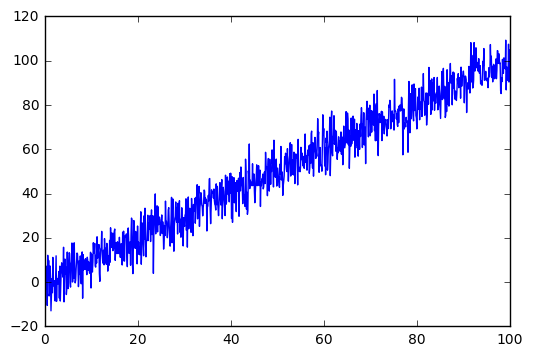

In [4]:
n_of_points = 1000
#create the data
X = np.linspace(0,100,n_of_points)
Y = X + 6*np.random.normal(0,1,n_of_points)
#polot
plt.plot(X,Y)
plt.show()

#### Creating the B matrix

In [5]:
B = np.zeros((degree,degree))
B[0,0] = len(Y)

for i1,x in enumerate(B):
    for i2,y in enumerate(x[:degree-i1]):
        B[i1,i1+i2] = np.sum(X**(2*i1+i2))
        
B += np.transpose(B)
B[np.eye(degree) == 1] /= 2
print(B)

[[  1.00000000e+03   5.00000000e+04   3.33500167e+06   2.50250250e+08
    2.00300334e+10]
 [  5.00000000e+04   3.33500167e+06   2.50250250e+08   2.00300334e+10
    1.67000417e+12]
 [  3.33500167e+06   2.50250250e+08   2.00300334e+10   1.67000417e+12
    1.43214786e+14]
 [  2.50250250e+08   2.00300334e+10   1.67000417e+12   1.43214786e+14
    1.25375584e+16]
 [  2.00300334e+10   1.67000417e+12   1.43214786e+14   1.25375584e+16
    1.11500667e+18]]


#### Creating the C

In [6]:
C = np.zeros((degree,1))
for i,x in enumerate(C):
    C[i] = np.sum(np.multiply(Y,X**i))
print(C)

[[  5.01386193e+04]
 [  3.34571705e+06]
 [  2.50825635e+08]
 [  2.00605495e+10]
 [  1.67150829e+12]]


#### Solving A B = C for A

In [7]:
A = linalg.solve(B,C)
print(A)

[[ -1.49314620e+00]
 [  1.15784357e+00]
 [ -4.71821287e-03]
 [  6.02292839e-05]
 [ -2.79458280e-07]]


# Result

In [8]:
y = np.zeros_like(Y)
for i,coeff in enumerate(A):
    y += coeff*X**i

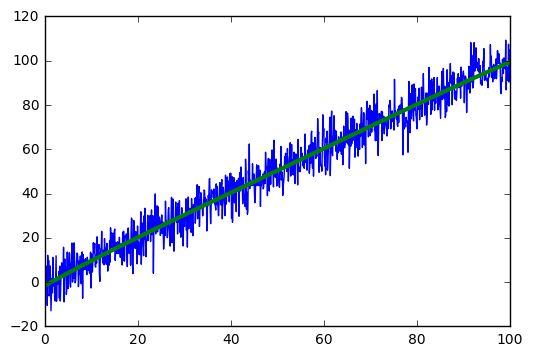

In [9]:
plt.plot(X,Y)
plt.plot(X,y, linewidth=3.0)
plt.show()

In [10]:
eq = "%f"%A[0]
for i,coeff in enumerate(A[1:]):
    eq += "+%f*X**%d"%(coeff,i+1)
print(eq.replace("+-","-"))

-1.493146+1.157844*X**1-0.004718*X**2+0.000060*X**3-0.000000*X**4
